In [1]:
import numpy as np # линейная алгебра
import os # доступ к структуре каталогов
import pandas as pd # обработка данных
from sklearn.model_selection import train_test_split #для разделения выборок
from sklearn.model_selection import cross_val_score #кросс-валидация
from sklearn.linear_model import Lasso #лассо-регрессия
from sklearn.linear_model import LogisticRegression #логистическая регрессия
from sklearn.metrics import classification_report,confusion_matrix #для оценки классификации
import matplotlib.pyplot as plt #графики
import plotly.express as px #графики
import seaborn as sns #графики

In [2]:
df1 = pd.read_csv('C:/Users/lalsk/Desktop/КУРСАЧ/input/data/scores.csv') #просматриваем файл
df1.head(2)

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0


In [3]:
df1.isnull()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,True,False,False,False,False,False,False
7,False,False,False,False,False,True,False,False,False,False,False,False
8,False,False,False,False,False,True,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df1['delta_madrs'] = df1.madrs2 - df1.madrs1 #добавим столбец с информацией насколько изменилась оценка за период наблюдения
df_condition = df1[df1.number.str.contains('condition')].copy() #разделим пациентов с депрессией 
df_control = df1[df1.number.str.contains('control')].copy().reset_index(drop=True)#и без нее

Для начала проанализируем пациентов с депрессией

In [5]:
df_condition.isnull() #проверяем отсутствующие данные

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,delta_madrs
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,True,False,False,False,False,False,False,False
7,False,False,False,False,False,True,False,False,False,False,False,False,False
8,False,False,False,False,False,True,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
#заметим,что в графе melanch значение почти у всех пациентов одинаковое, поэтому высока вероятность того, 
#что на месте пропущенных значений будет оно же(заменим средним по столбцу)
df_condition.melanch = df_condition.melanch.fillna(np.round(df_condition.melanch.mean()))
df_condition.melanch = df_condition.melanch.astype('category') #будем расценивать значения melanch как категории
df_condition.melanch = df_condition.melanch.cat.rename_categories({1.0 : '1',
                                                                   2.0 : '2'})
#пол и возраст также переводим в категориальный тип
df_condition.age = df_condition.age.astype('category')
df_condition.gender = df_condition.gender.astype('category')
df_condition.edu = df_condition.edu.astype('category')
#Прочие значения представлены типом float, поэтому для начала переводим их в int, и только потом в category
df_condition.afftype = df_condition.afftype.astype(int).astype('category')
df_condition.inpatient = df_condition.inpatient.astype(int).astype('category')
df_condition.marriage = df_condition.marriage.astype(int).astype('category')
df_condition.work = df_condition.work.astype(int).astype('category')
#в столбце, говорящем об образовании наблюдаемых, отсутствует информация об одном пациенте, 
#исходя из данных сложно определить пропущенное значение, поэтому не будем его учитывать при рассмотрении взаимосвязей
df_condition.edu = df_condition.edu.cat.rename_categories({' ' : 'miss'})
df_condition.head(23) #просматриваем набор данных после преобразований

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,delta_madrs
0,condition_1,11,2,35-39,2,2,2,6-10,1,2,19.0,19.0,0.0
1,condition_2,18,2,40-44,1,2,2,6-10,2,2,24.0,11.0,-13.0
2,condition_3,13,1,45-49,2,2,2,6-10,2,2,24.0,25.0,1.0
3,condition_4,13,2,25-29,2,2,2,11-15,1,1,20.0,16.0,-4.0
4,condition_5,13,2,50-54,2,2,2,11-15,2,2,26.0,26.0,0.0
5,condition_6,7,1,35-39,2,2,2,6-10,1,2,18.0,15.0,-3.0
6,condition_7,11,1,20-24,1,2,2,11-15,2,1,24.0,25.0,1.0
7,condition_8,5,2,25-29,2,2,2,11-15,1,2,20.0,16.0,-4.0
8,condition_9,13,2,45-49,1,2,2,6-10,1,2,26.0,26.0,0.0
9,condition_10,9,2,45-49,2,2,2,6-10,1,2,28.0,21.0,-7.0


In [7]:
#разделим числовые и категориальные характеристики, будем рассматривать их по отдельности
num = ['days','madrs1','madrs2','delta_madrs']
cat = ['age', 'gender', 'afftype', 'melanch', 'inpatient', 'edu', 'marriage', 'work']

Числовые характеристики

In [8]:
df_condition[num].describe() #базовая статистика

,days,madrs1,madrs2,delta_madrs
count,23.000000,23.000000,23.000000,23.000000
mean,12.652174,22.739130,20.000000,-2.739130
std,2.773391,4.797892,4.729021,3.968253
min,5.000000,13.000000,11.000000,-13.000000
25%,12.500000,18.500000,16.000000,-5.000000
50%,13.000000,24.000000,21.000000,-3.000000
75%,14.000000,26.000000,24.500000,0.000000
max,18.000000,29.000000,28.000000,4.000000


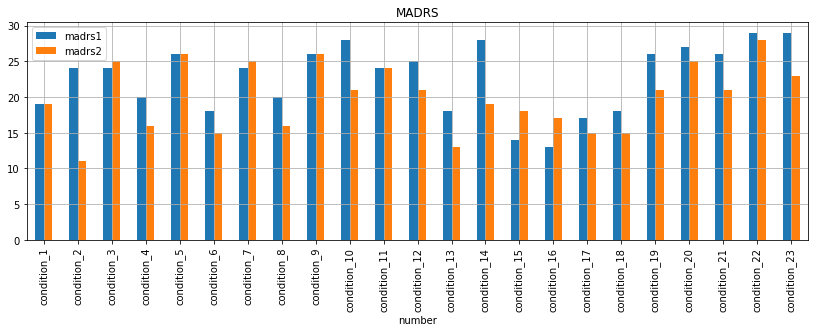

In [9]:
#гистограмма оценок MADRS (до / после)
plt.rcParams['figure.figsize'] = (14,4)
df_condition.plot(x='number', y=['madrs1','madrs2'], kind='bar')
plt.title('MADRS')
plt.grid()
plt.show()

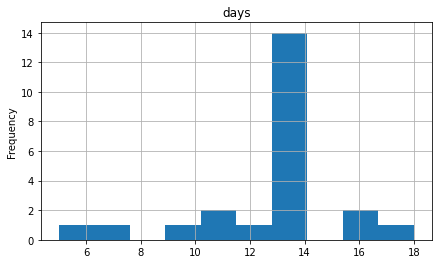

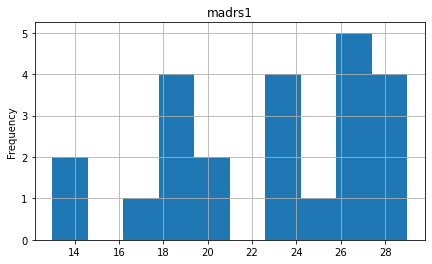

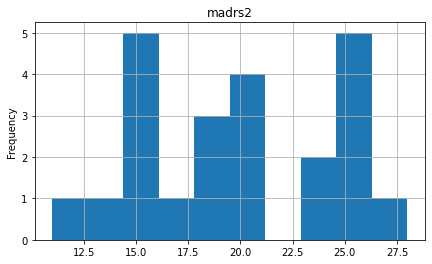

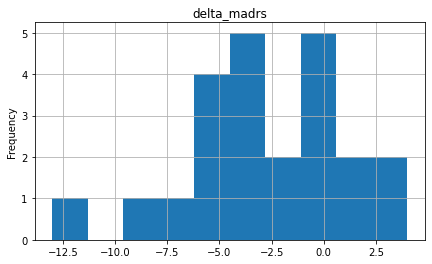

In [10]:
#график распределения числовых характеристик
plt.rcParams['figure.figsize'] = (7,4)
for f in num:
    df_condition[f].plot(kind='hist')    
    plt.title(f)
    plt.grid()
    plt.show()

In [11]:
#корреляционная матрица
df_condition[num].corr(method='pearson')

,days,madrs1,madrs2,delta_madrs
days,1.000000,0.122678,0.027726,-0.115285
madrs1,0.122678,1.000000,0.653090,-0.430772
madrs2,0.027726,0.653090,1.000000,0.402082
delta_madrs,-0.115285,-0.430772,0.402082,1.000000


_______ 
Характеристики категориальных значений

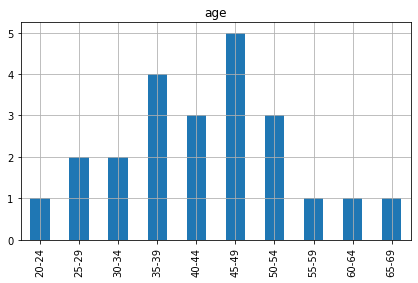

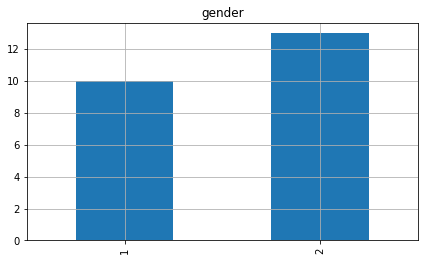

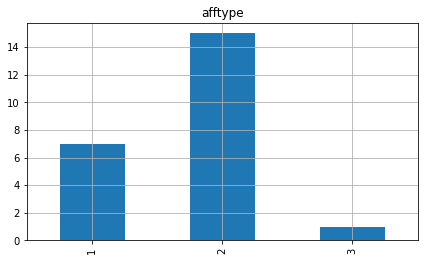

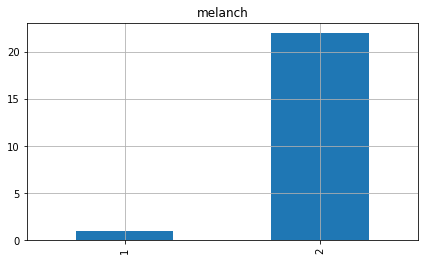

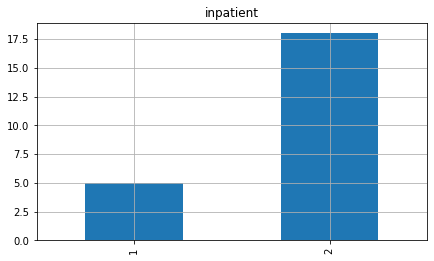

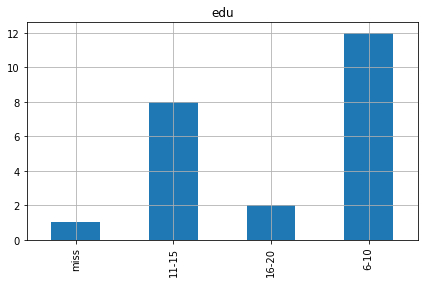

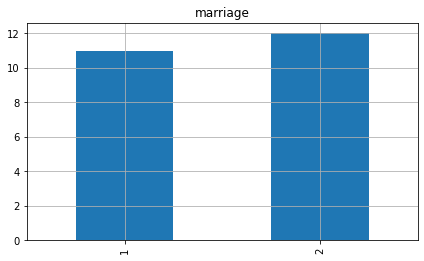

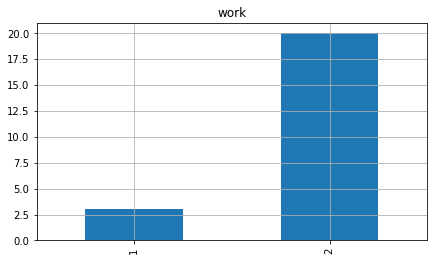

In [12]:
#график распределения категориальных признаков
plt.rcParams['figure.figsize'] = (7,4)
for f in cat:
    df_condition[f].value_counts().sort_index().plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()

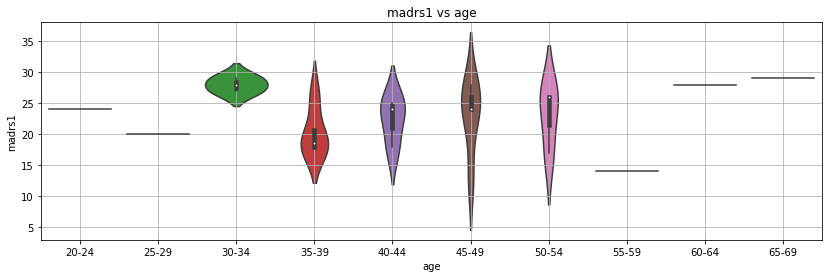

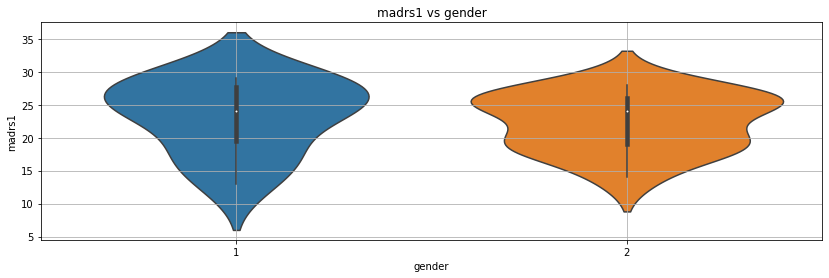

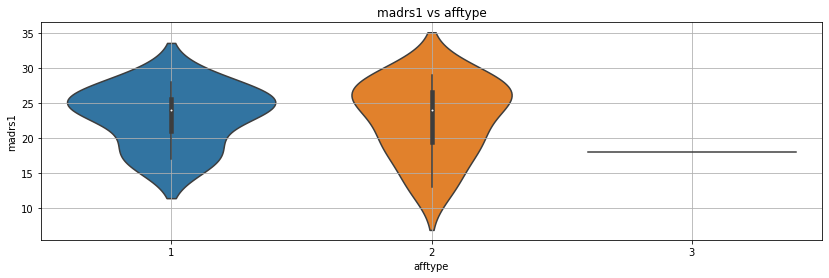

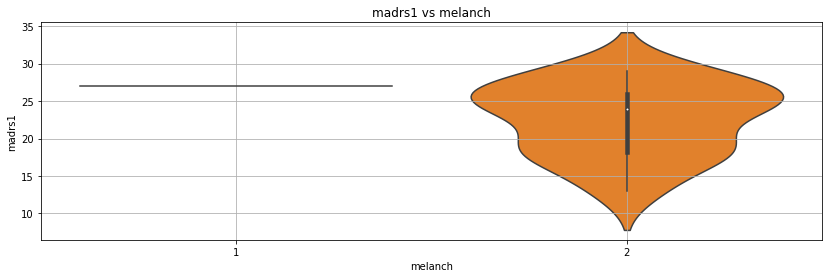

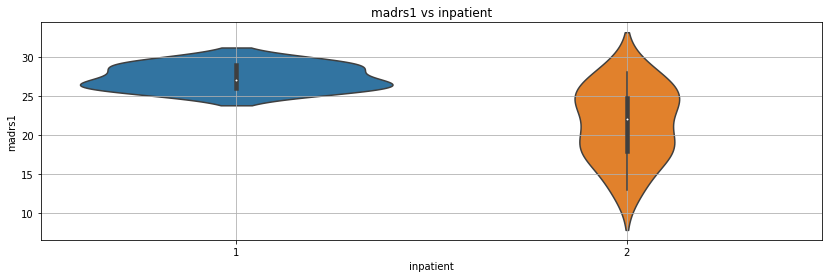

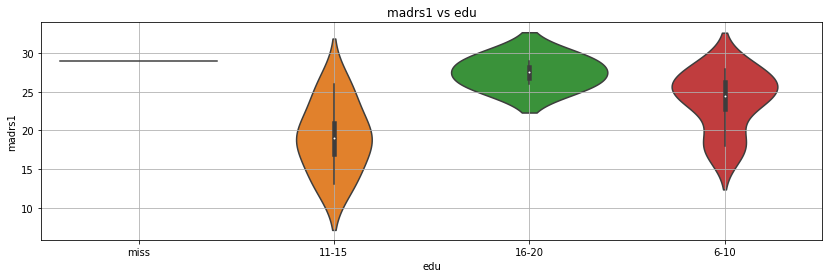

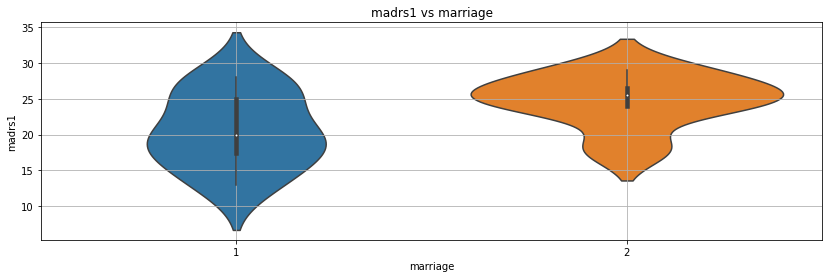

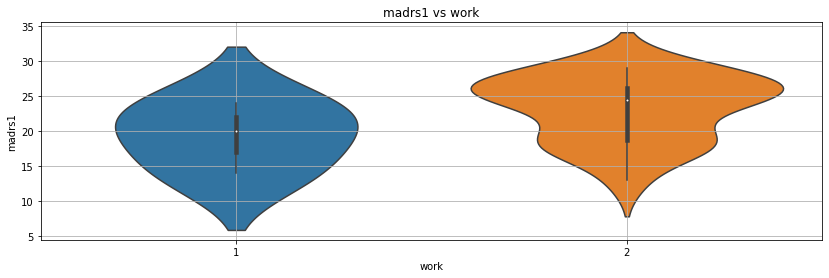

In [13]:
#влияние функции на оценку madrs1 (в начале измерения активности)
for f in cat:
    plt.figure(figsize=(14,4))
    sns.violinplot(data=df_condition, x=f, y='madrs1')
    plt.title('madrs1 vs ' + f)
    plt.grid()
    plt.show()

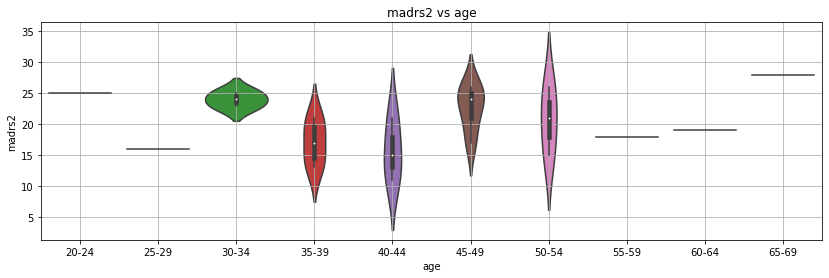

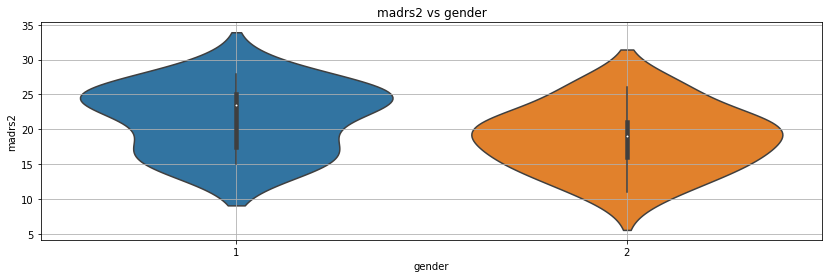

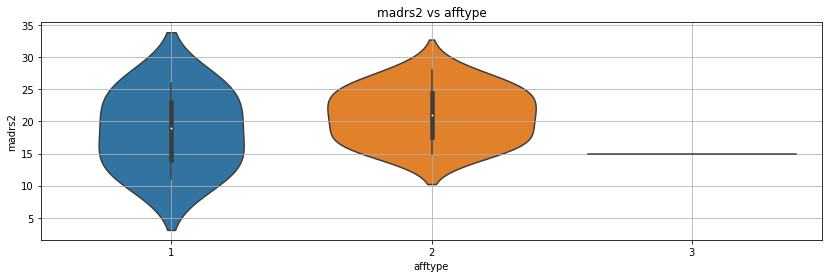

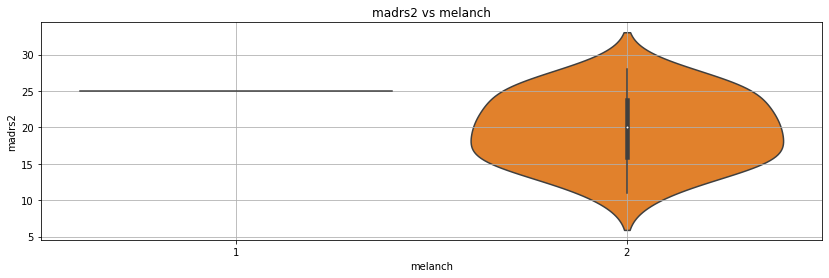

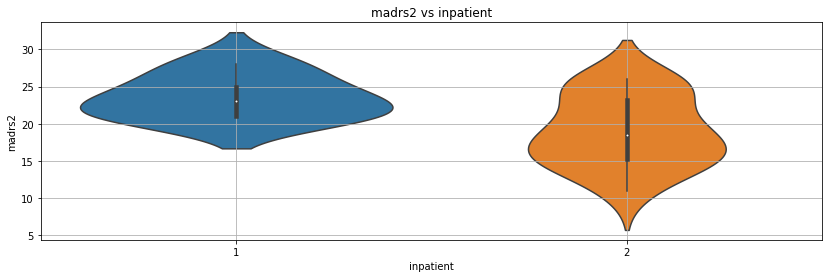

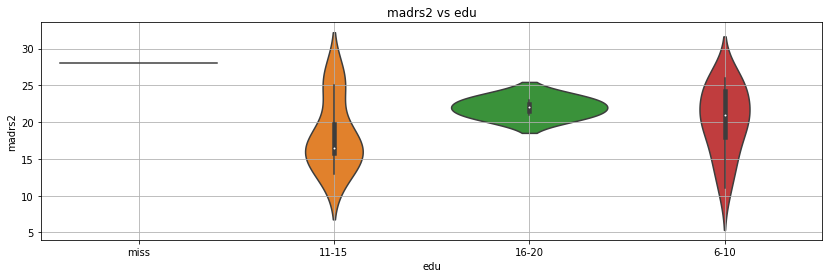

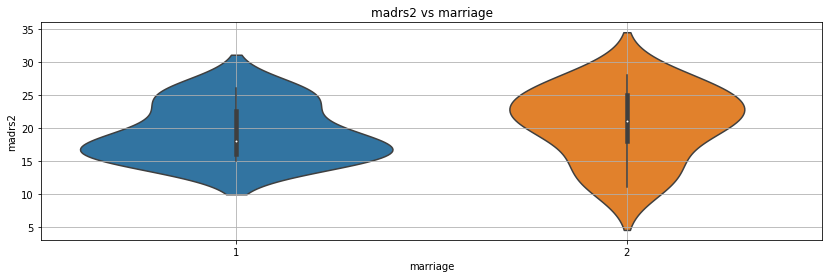

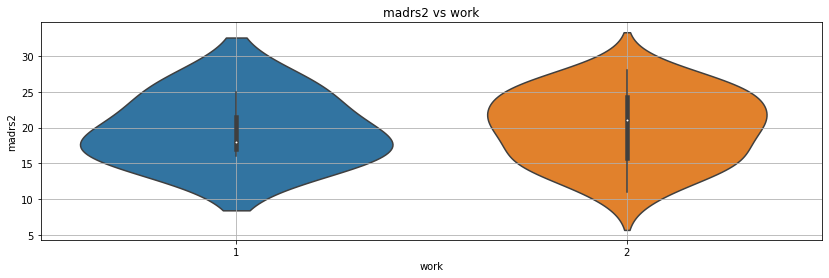

In [14]:
#влияние функции на оценку madrs2 (в конце измерения активности)
for f in cat:
    plt.figure(figsize=(14,4))
    sns.violinplot(data=df_condition, x=f, y='madrs2')
    plt.title('madrs2 vs ' + f)
    plt.grid()
    plt.show()

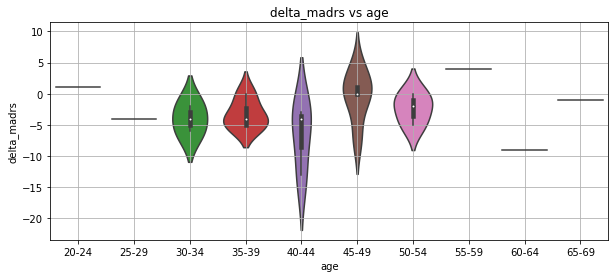

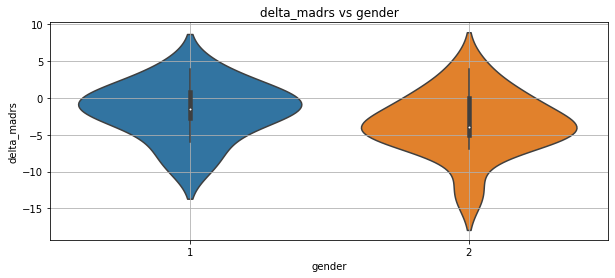

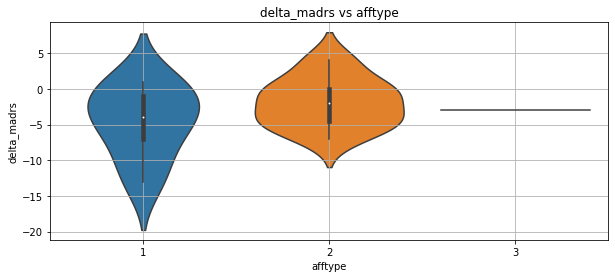

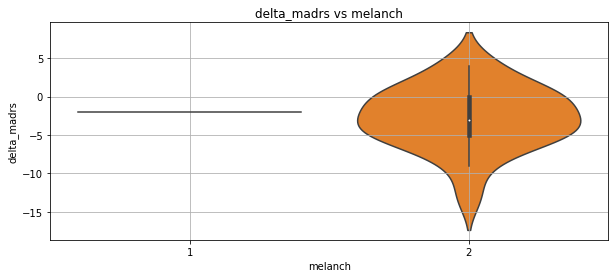

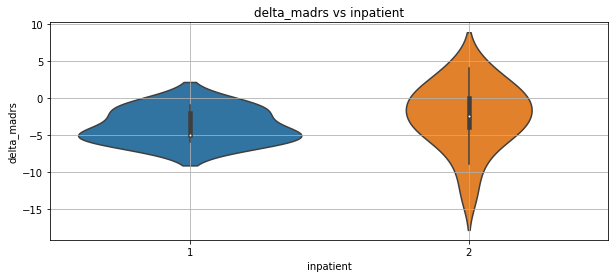

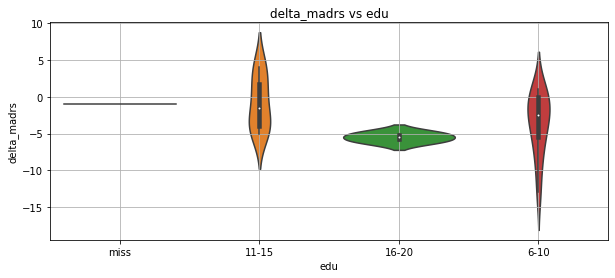

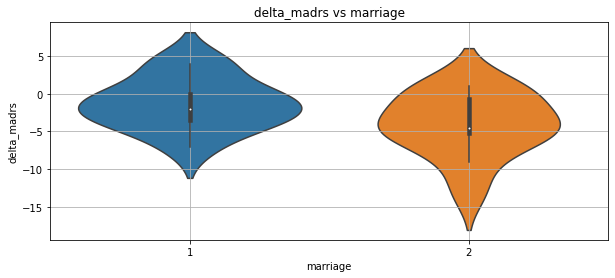

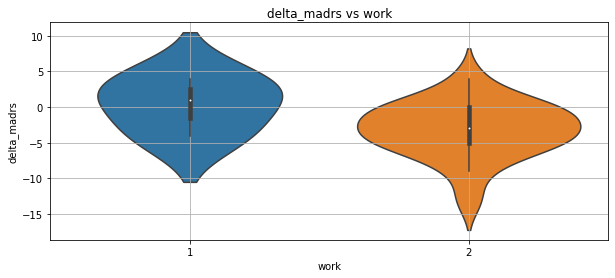

In [15]:
#влияние функции на разницу в баллах DeltaMADRS = madrs2 - madrs1
for f in cat:
    plt.figure(figsize=(10,4))
    sns.violinplot(data=df_condition, x=f, y='delta_madrs')
    plt.title('delta_madrs vs ' + f)
    plt.grid()
    plt.show()

_______
Изучим таблицу со здоровыми людьми

In [16]:
#преобразование типов
df_control.age = df_control.age.astype('category')
df_control.gender = df_control.gender.astype('category')

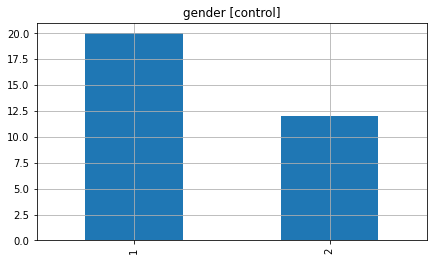

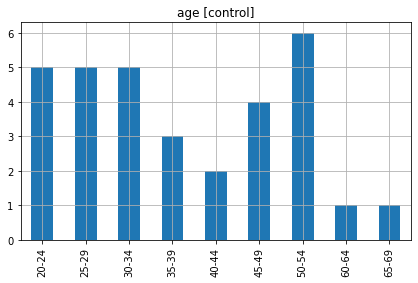

In [17]:
#график распределения категориальных признаков
df_control.gender.value_counts().sort_index().plot(kind='bar')
plt.title('gender [control]')
plt.grid()
plt.show()

df_control.age.value_counts().sort_index().plot(kind='bar')
plt.title('age [control]')
plt.grid()
plt.show()

_______

Изучим данные об активности наблюдаемых на примере одного из них

In [18]:
#загрузить один файл
my_file = 'C:/Users/lalsk/Desktop/КУРСАЧ/input/data/condition/condition_1.csv'
df_act = pd.read_csv(my_file)
df_act.head(2)

,timestamp,date,activity
0,2003-05-07 12:00:00,2003-05-07,0
1,2003-05-07 12:01:00,2003-05-07,143


In [19]:
df_act.shape #проверим его размер

(23244, 3)

In [20]:
#базовая статистика активности
df_act.activity.describe()

count    23244.000000
mean       146.948030
std        294.592424
min          0.000000
25%          0.000000
50%          9.000000
75%        172.000000
max       3526.000000
Name: activity, dtype: float64

In [21]:
#добавить логарифмическую версию активности
df_act['log1_act'] = np.log10(1+df_act.activity)
#добавить ненулевой индикатор активности
df_act['non_zero'] = (df_act.activity>0).astype(int)
df_act.head()

,timestamp,date,activity,log1_act,non_zero
0,2003-05-07 12:00:00,2003-05-07,0,0.000000,0
1,2003-05-07 12:01:00,2003-05-07,143,2.158362,1
2,2003-05-07 12:02:00,2003-05-07,0,0.000000,0
3,2003-05-07 12:03:00,2003-05-07,20,1.322219,1
4,2003-05-07 12:04:00,2003-05-07,166,2.222716,1


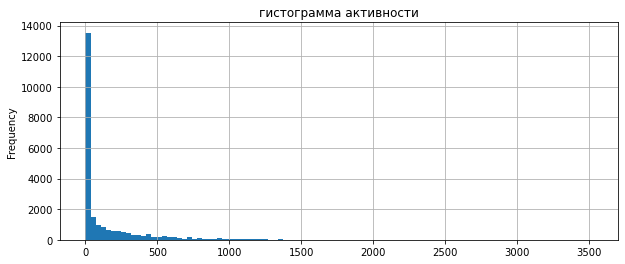

In [22]:
#распределение активности
plt.figure(figsize=(10,4))
df_act.activity.plot(kind='hist', bins=100)
plt.title('гистограмма активности')
plt.grid()
plt.show()

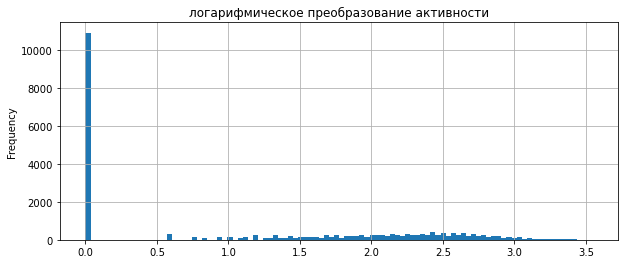

In [23]:
#распределение активности - логарифмическое преобразование
plt.figure(figsize=(10,4))
df_act.log1_act.plot(kind='hist', bins=100)
plt.title('логарифмическое преобразование активности')
plt.grid()
plt.show()

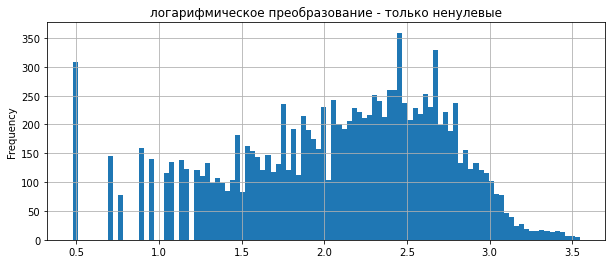

In [24]:
#распределение активности - логарифмическое преобразование - только ненулевые
plt.figure(figsize=(10,4))
np.log10(df_act[df_act.non_zero==1].activity).plot(kind='hist', bins=100)
plt.title('логарифмическое преобразование - только ненулевые')
plt.grid()
plt.show()

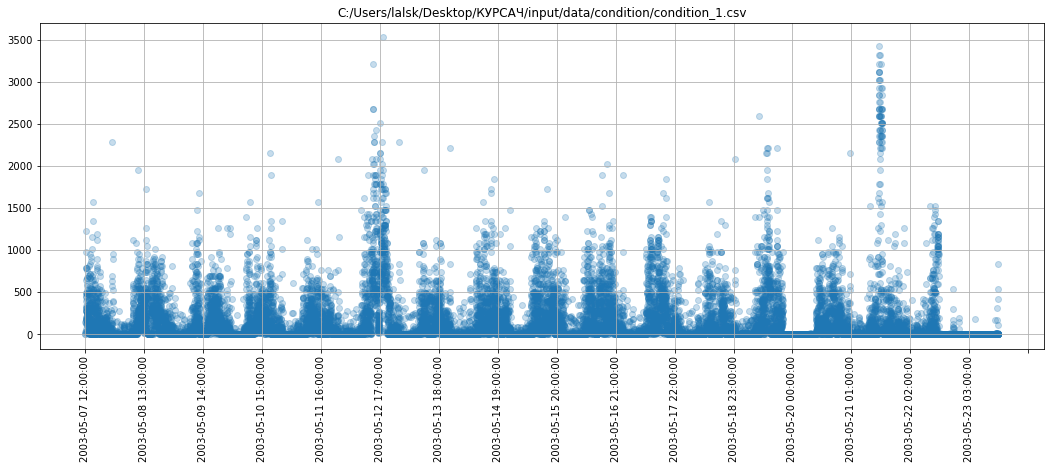

In [25]:
#построить временной ряд с полной активностью
my_alpha=0.25
fig, ax = plt.subplots(figsize=(18,6))
ax.scatter(df_act.timestamp, df_act.activity , alpha=my_alpha)
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.title(my_file)
plt.xticks(rotation=90)
plt.grid()
plt.show()

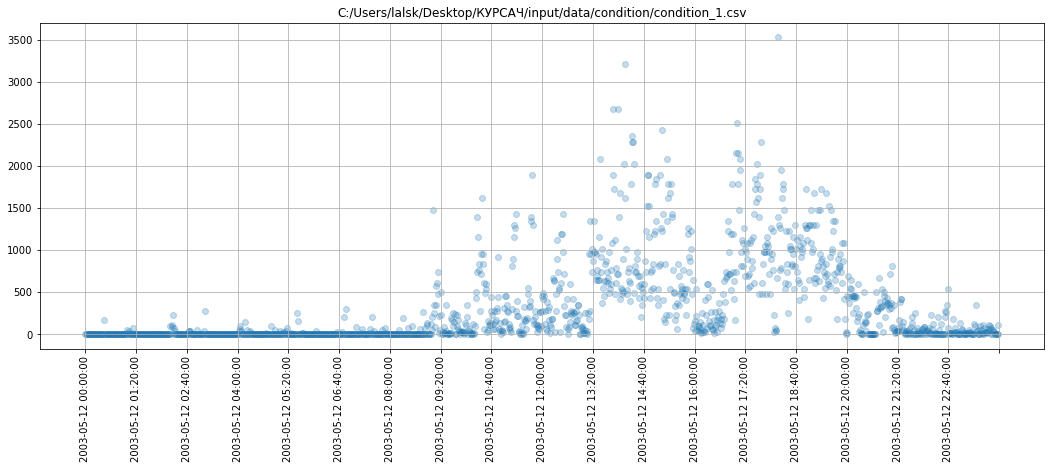

In [26]:
#увеличить конкретный день
df_act_zoom = df_act[df_act.date=='2003-05-12']
my_alpha=0.25
fig, ax = plt.subplots(figsize=(18,6))
ax.scatter(df_act_zoom.timestamp, df_act_zoom.activity, alpha=my_alpha)
ax.xaxis.set_major_locator(plt.MaxNLocator(20)) # уменьшить количество меток оси X
plt.title(my_file)
plt.xticks(rotation=90)
plt.grid()
plt.show()

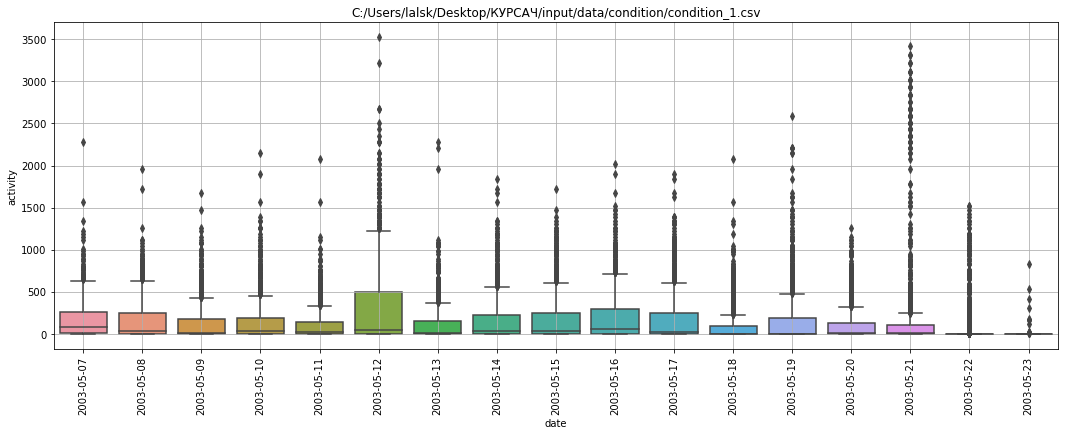

In [27]:
#группировать активность по дате
plt.subplots(figsize=(18,6))
sns.boxplot(data=df_act, x='date', y='activity')
plt.xticks(rotation=90)
plt.title(my_file)
plt.grid()
plt.show()

In [28]:
#группировать по дате
df_act_by_date = df_act.groupby(['date'], as_index=False).agg(
    n = pd.NamedAgg(column='activity', aggfunc='count'),
    n_non_zero = pd.NamedAgg(column='non_zero', aggfunc='sum'),
    mean_act = pd.NamedAgg(column='activity', aggfunc='mean'),
    q75_act = pd.NamedAgg(column='activity', aggfunc=lambda x : np.percentile(a=x, q=75)),
    q90_act = pd.NamedAgg(column='activity', aggfunc=lambda x : np.percentile(a=x, q=90)),
    q95_act = pd.NamedAgg(column='activity', aggfunc=lambda x : np.percentile(a=x, q=95)),
    q99_act = pd.NamedAgg(column='activity', aggfunc=lambda x : np.percentile(a=x, q=99)),
    max_act = pd.NamedAgg(column='activity', aggfunc='max'))

df_act_by_date.head(2)

,date,n,n_non_zero,mean_act,q75_act,q90_act,q95_act,q99_act,max_act
0,2003-05-07,720,573,174.144444,259.00,485.0,667.0,1003.92,2284
1,2003-05-08,1440,851,156.247222,252.25,485.0,626.0,890.00,1954


Первый и последний день в этом примере неполные. Для сравнения удалим те неполные дни

In [29]:
#удалить неполные дни из статистики
df_act_by_date = df_act_by_date[df_act_by_date.n==1440]
# 1440 = 24*60 минут в день
df_act_by_date.head(2)

,date,n,n_non_zero,mean_act,q75_act,q90_act,q95_act,q99_act,max_act
1,2003-05-08,1440,851,156.247222,252.25,485.0,626.0,890.0,1954
2,2003-05-09,1440,775,124.135417,172.00,398.0,587.0,948.0,1672


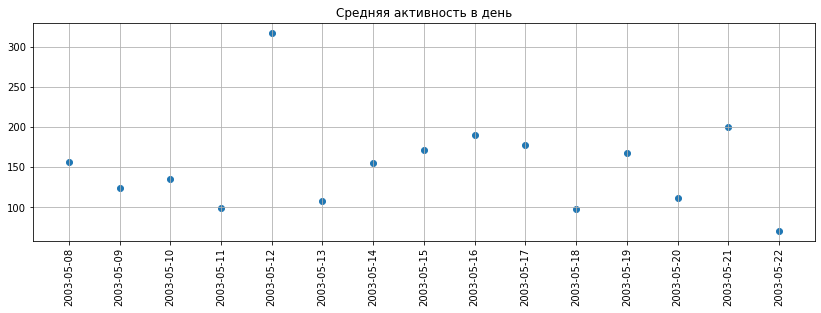

Среднее значение дневной активности: 152.2
Стандартное отклонение дневной активности: 59.22


In [30]:
#график средней активности за день
plt.figure(figsize=(14,4))
plt.scatter(df_act_by_date.date, df_act_by_date.mean_act)
plt.title('Средняя активность в день')
plt.xticks(rotation=90)
plt.grid()
plt.show()

print('Среднее значение дневной активности:', np.round(df_act_by_date.mean_act.mean(),2))
print('Стандартное отклонение дневной активности:', np.round(df_act_by_date.mean_act.std(),2))

Мы наблюдаем несколько дней, когда активность не фиксируется / почти не регистрируется. Это не кажется разумным (возможно, датчик был отключен / не работал должным образом на этом этапе). В следующие дни мы удалим дни с такой крайне низкой активностью.

In [31]:
#определить (среднесуточное) пороговое значение, ниже которого мы считаем данные непригодными для использования
daily_threshold = 10

Файлы condition

In [32]:
#перебираем все файлы и извлекаем статистику
mean_list = []
std_list = []
q99_list = []
std_q99_list = []

In [33]:
for dirname, _, filenames in os.walk('C:/Users/lalsk/Desktop/КУРСАЧ/input/data/condition'):
    for filename in filenames:
        my_file = os.path.join(dirname, filename)
        print('Extracting from:', my_file)
        df_temp = pd.read_csv(my_file)
    
    # группировать по дате
        df_temp_by_date = df_temp.groupby(['date'], as_index=False).agg(
            n = pd.NamedAgg(column='activity', aggfunc='count'),
            mean_act = pd.NamedAgg(column='activity', aggfunc='mean'),
            q99_act = pd.NamedAgg(column='activity', aggfunc=lambda x : np.percentile(a=x, q=99)),
            max_act = pd.NamedAgg(column='activity', aggfunc='max')
        )

    # удалить неполные дни (24 * 60 минут = 1440)
        df_temp_by_date = df_temp_by_date[df_temp_by_date.n==1440]
    # удалить дни с необоснованно низкой средней дневной активностью
        df_temp_by_date = df_temp_by_date[df_temp_by_date.mean_act > daily_threshold]
    
        print(df_temp_by_date)
        print()
    
    #извлечь статистику
        mean_temp = df_temp_by_date.mean_act.mean() # среднее значение средней дневной активности
        std_temp = df_temp_by_date.mean_act.std() # стандартное отклонение средней дневной активности
        mean_q99_temp = df_temp_by_date.q99_act.mean() # среднее значение 99-го процентиля дневной активности
        std_q99_temp = df_temp_by_date.q99_act.std() # стандартное отклонение 99-го процентиля дневной активности
    
    #добавить результаты в списки
        mean_list.append(mean_temp)
        std_list.append(std_temp)
        q99_list.append(mean_q99_temp)
        std_q99_list.append(std_q99_temp)

Extracting from: C:/Users/lalsk/Desktop/КУРСАЧ/input/data/condition\condition_1.csv
          date     n    mean_act  q99_act  max_act
1   2003-05-08  1440  156.247222   890.00     1954
2   2003-05-09  1440  124.135417   948.00     1672
3   2003-05-10  1440  134.961806  1097.35     2146
4   2003-05-11  1440   99.439583   759.00     2080
5   2003-05-12  1440  316.874306  2055.04     3526
6   2003-05-13  1440  108.475694   879.08     2284
7   2003-05-14  1440  155.684722  1182.00     1836
8   2003-05-15  1440  170.877083  1146.00     1725
9   2003-05-16  1440  190.508333  1167.96     2016
10  2003-05-17  1440  177.760417  1205.79     1894
11  2003-05-18  1440   97.729167   966.30     2080
12  2003-05-19  1440  168.102778  1474.00     2586
13  2003-05-20  1440  111.488194   948.00     1260
14  2003-05-21  1440  199.597222  2839.00     3418
15  2003-05-22  1440   71.112500  1167.96     1521

Extracting from: C:/Users/lalsk/Desktop/КУРСАЧ/input/data/condition\condition_10.csv
          date

          date     n    mean_act  q99_act  max_act
1   2002-08-30  1440  152.131250  1261.00     1726
2   2002-08-31  1440   69.827083   906.69     3537
3   2002-09-01  1440   81.056944   948.00     3537
4   2002-09-02  1440  219.061806  1551.89     2288
5   2002-09-03  1440  199.300000  1221.00     2361
6   2002-09-04  1440  318.611111  1386.00     2361
7   2002-09-05  1440  172.038889  1221.00     2218
8   2002-09-06  1440  147.395139  1132.57     2288
9   2002-09-07  1440   94.944444  1043.00     8000
10  2002-09-08  1440   80.885417   861.00     2513
11  2002-09-09  1440  236.752778  1386.00     3124
12  2002-09-10  1440  189.115972  1076.00     1621
13  2002-09-11  1440  194.648611  1110.00     2218
14  2002-09-12  1440   92.529861  1096.74     1571

Extracting from: C:/Users/lalsk/Desktop/КУРСАЧ/input/data/condition\condition_2.csv
          date     n    mean_act  q99_act  max_act
1   2003-05-08  1440  259.645139  1496.67     3736
2   2003-05-09  1440  244.096528  1362.23     31

13  2004-06-09  1440  168.656250  1509.00     2199



In [34]:
#сохранять результаты во фрейме данных
condition_stats = pd.DataFrame(zip(df_condition.number, mean_list, q99_list, std_list, std_q99_list), 
                               columns=['number','Mean_MeanAct','Mean_Q99Act','Std_MeanAct','Std_Q99Act'])
# добавить коэффициент вариации (стандартное отклонение / среднее значение)
condition_stats['CV_MeanAct'] = condition_stats.Std_MeanAct / condition_stats.Mean_MeanAct
condition_stats['CV_Q99Act'] = condition_stats.Std_Q99Act / condition_stats.Mean_Q99Act
condition_stats

,number,Mean_MeanAct,Mean_Q99Act,Std_MeanAct,Std_Q99Act,CV_MeanAct,CV_Q99Act
0,condition_1,152.199630,1248.365333,59.218240,537.750628,0.389083,0.430764
1,condition_2,296.403373,1691.552143,84.898469,256.541836,0.286429,0.151661
2,condition_3,130.193472,1250.976000,64.907332,317.950239,0.498545,0.254162
3,condition_4,152.202579,1150.928571,63.119931,315.606819,0.414710,0.274219
4,condition_5,250.221389,1472.341333,66.762782,202.977926,0.266815,0.137861
5,condition_6,73.919345,854.062143,24.937508,322.492206,0.337361,0.377598
6,condition_7,110.199752,1021.992857,60.377039,367.810858,0.547887,0.359896
7,condition_8,224.404707,1594.229444,75.568803,377.177396,0.336752,0.236589
8,condition_9,86.658532,839.977143,11.406454,481.204262,0.131625,0.572878
9,condition_10,71.438393,665.491429,9.301415,96.547265,0.130202,0.145077


In [35]:
#посмотреть на соотношение разных показателей
corr = condition_stats.corr()
corr.style.background_gradient(cmap='coolwarm')

,Mean_MeanAct,Mean_Q99Act,Std_MeanAct,Std_Q99Act,CV_MeanAct,CV_Q99Act
Mean_MeanAct,1.000000,0.911266,0.755293,0.262670,0.213459,-0.214997
Mean_Q99Act,0.911266,1.000000,0.746642,0.453874,0.326929,-0.085445
Std_MeanAct,0.755293,0.746642,1.000000,0.587979,0.745768,0.156139
Std_Q99Act,0.262670,0.453874,0.587979,1.000000,0.592501,0.811374
CV_MeanAct,0.213459,0.326929,0.745768,0.592501,1.000000,0.373447
CV_Q99Act,-0.214997,-0.085445,0.156139,0.811374,0.373447,1.000000


Файлы control

In [36]:
#перебираем все файлы и извлекаем статистику
mean_list_control = []
std_list_control = []
q99_list_control = []
std_q99_list_control = []

In [37]:
for dirname, _, filenames in os.walk('C:/Users/lalsk/Desktop/КУРСАЧ/input/data/control'):
    for filename in filenames:
        my_file = os.path.join(dirname, filename)
        print('Extracting from:', my_file)
        df_temp = pd.read_csv(my_file)
    
    # группировать по дате
        df_temp_by_date = df_temp.groupby(['date'], as_index=False).agg(
            n = pd.NamedAgg(column='activity', aggfunc='count'),
            mean_act = pd.NamedAgg(column='activity', aggfunc='mean'),
            q99_act = pd.NamedAgg(column='activity', aggfunc=lambda x : np.percentile(a=x, q=99)),
            max_act = pd.NamedAgg(column='activity', aggfunc='max')
        )

    # удалить неполные дни (24 * 60 минут = 1440)
        df_temp_by_date = df_temp_by_date[df_temp_by_date.n==1440]
    #удалить дни с необоснованно низкой средней дневной активностью
        df_temp_by_date = df_temp_by_date[df_temp_by_date.mean_act > daily_threshold]
    
        print(df_temp_by_date)
        print()
    
    # извлечь статистику
        mean_temp = df_temp_by_date.mean_act.mean() # среднее значение средней дневной активности
        std_temp = df_temp_by_date.mean_act.std() # стандартное отклонение средней дневной активности
        mean_q99_temp = df_temp_by_date.q99_act.mean() # среднее значение 99-го процентиля дневной активности
        std_q99_temp = df_temp_by_date.q99_act.std() # стандартное отклонение 99-го процентиля дневной активности

    # добавить результаты в списки
        mean_list_control.append(mean_temp)
        std_list_control.append(std_temp)
        q99_list_control.append(mean_q99_temp)
        std_q99_list_control.append(std_q99_temp)

Extracting from: C:/Users/lalsk/Desktop/КУРСАЧ/input/data/control\control_1.csv
          date     n    mean_act  q99_act  max_act
1   2003-03-19  1440  185.568056  1607.00     3097
2   2003-03-20  1440  225.981250  1712.00     2651
3   2003-03-21  1440  169.663194  1375.00     2066
4   2003-03-22  1440  183.690972  1290.00     2415
5   2003-03-23  1440  347.075000  1332.00     1824
6   2003-03-24  1440  194.423611  1638.72     2341
7   2003-03-25  1440  310.715278  1882.00     2651
8   2003-03-26  1440  199.518750  1520.95     3195
9   2003-03-27  1440  183.131944  1358.23     2199
10  2003-03-28  1440  218.872222  1745.55     2415
11  2003-03-29  1440  276.368750  1509.00     4221
13  2003-03-31  1440  232.002778  1918.60     6117
14  2003-04-01  1440  109.022917  1418.00     2911
15  2003-04-02  1440  128.501389  3156.78     5575
16  2003-04-03  1440   69.356250  2003.00     3506
17  2003-04-04  1440   55.559028  2492.00     3097

Extracting from: C:/Users/lalsk/Desktop/КУРСАЧ/input

          date     n    mean_act  q99_act  max_act
1   2004-01-10  1440  217.670139  1217.00     2741
2   2004-01-11  1440  226.311111  1829.00     2576
3   2004-01-12  1440  211.151389  1468.00     1886
4   2004-01-13  1440  239.997917  1336.00     1665
5   2004-01-14  1440  189.746528  1423.00     2138
6   2004-01-15  1440  193.254167  1295.00     1829
7   2004-01-16  1440  352.625000  2112.26     2918
8   2004-01-17  1440  185.040278  1362.23     2072
9   2004-01-18  1440  202.027083  1336.00     2828
10  2004-01-19  1440  215.909028  1362.23     1773
11  2004-01-20  1440  221.211111  1320.01     1946
12  2004-01-21  1440  212.795139  1336.00     1886
13  2004-01-22  1440  253.961806  1468.00     2347
14  2004-01-23  1440  101.114583   915.00     1614
18  2004-01-27  1440   13.559722   399.04     1515

Extracting from: C:/Users/lalsk/Desktop/КУРСАЧ/input/data/control\control_2.csv
          date     n    mean_act  q99_act  max_act
1   2002-10-03  1440  271.193056  1538.89     2131
2

          date     n    mean_act  q99_act  max_act
1   2006-01-07  1440  313.309722  2080.00     3314
2   2006-01-08  1440  233.874306  1780.00     2752
3   2006-01-09  1440  300.200694  1725.00     2752
4   2006-01-10  1440  259.169444  1725.00     2839
5   2006-01-11  1440  240.443750  1521.00     2430
6   2006-01-12  1440  306.146528  1871.38     2586
7   2006-01-13  1440  271.017361  1570.00     3752
8   2006-01-14  1440  304.661806  1968.42     3418
9   2006-01-15  1440  249.707639  1550.89     2839
10  2006-01-16  1440  292.127778  1780.00     2752
11  2006-01-17  1440  242.059028  1725.00     3418
12  2006-01-18  1440  371.976389  2146.00     3418
13  2006-01-19  1440  260.327778  1672.00     2586
14  2006-01-20  1440   84.575000  1351.24     3116

Extracting from: C:/Users/lalsk/Desktop/КУРСАЧ/input/data/control\control_3.csv
          date     n    mean_act  q99_act  max_act
1   2002-11-07  1440  190.939583  1178.00     1773
2   2002-11-08  1440  249.860417  1496.67     2072
3

15  2003-11-26  1440   48.894444   748.25     1261



In [38]:
#сохранять результаты во фрейме данных
control_stats =  pd.DataFrame(zip(df_control.number, mean_list_control, q99_list_control, std_list_control, std_q99_list_control), 
                               columns=['number','Mean_MeanAct','Mean_Q99Act','Std_MeanAct','Std_Q99Act'])
# добавить коэффициент вариации (стандартное отклонение / среднее значение)
control_stats['CV_MeanAct'] = control_stats.Std_MeanAct / control_stats.Mean_MeanAct
control_stats['CV_Q99Act'] = control_stats.Std_Q99Act / control_stats.Mean_Q99Act
control_stats

,number,Mean_MeanAct,Mean_Q99Act,Std_MeanAct,Std_Q99Act,CV_MeanAct,CV_Q99Act
0,control_1,193.090712,1747.426875,79.180375,488.183345,0.410068,0.279373
1,control_2,290.439782,1865.657143,83.298433,324.491722,0.286801,0.173929
2,control_3,189.521726,1413.931429,57.936198,305.621435,0.305697,0.216150
3,control_4,139.782917,915.619333,48.599370,190.024036,0.347677,0.207536
4,control_5,175.276835,1232.532857,65.257581,264.449572,0.372311,0.214558
5,control_6,362.287450,2426.409286,109.543682,390.008329,0.302367,0.160735
6,control_7,291.706300,1873.499286,51.202618,227.396796,0.175528,0.121375
7,control_8,225.280602,1300.922000,78.711319,345.452784,0.349392,0.265545
8,control_9,242.138194,1395.502857,61.259673,186.730084,0.252995,0.133808
9,control_10,282.217659,1642.464286,88.677220,308.698124,0.314216,0.187948


In [39]:
#посмотреть на соотношение разных показателей
corr = control_stats.corr()
corr.style.background_gradient(cmap='coolwarm')

,Mean_MeanAct,Mean_Q99Act,Std_MeanAct,Std_Q99Act,CV_MeanAct,CV_Q99Act
Mean_MeanAct,1.000000,0.849838,0.684530,0.495685,-0.087928,0.273292
Mean_Q99Act,0.849838,1.000000,0.644619,0.690179,0.012979,0.425698
Std_MeanAct,0.684530,0.644619,1.000000,0.721062,0.659783,0.699030
Std_Q99Act,0.495685,0.690179,0.721062,1.000000,0.459930,0.932576
CV_MeanAct,-0.087928,0.012979,0.659783,0.459930,1.000000,0.661419
CV_Q99Act,0.273292,0.425698,0.699030,0.932576,0.661419,1.000000


Сравним показатели здоровых людей и людей с депрессией

In [40]:
condition_stats.describe()

,Mean_MeanAct,Mean_Q99Act,Std_MeanAct,Std_Q99Act,CV_MeanAct,CV_Q99Act
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,177.359263,1293.282746,60.221801,318.413688,0.327726,0.248803
std,75.725958,335.760931,39.333135,168.601320,0.135601,0.122393
min,65.370585,665.491429,9.301415,96.547265,0.130202,0.106936
25%,120.196612,1030.523544,28.137077,190.752177,0.229600,0.158577
50%,172.622371,1300.538571,60.377039,287.349708,0.286429,0.199776
75%,235.399106,1574.730899,73.919049,389.201044,0.432363,0.349973
max,296.403373,1804.810000,166.280241,745.719621,0.581268,0.572878


In [41]:
control_stats.describe()

,Mean_MeanAct,Mean_Q99Act,Std_MeanAct,Std_Q99Act,CV_MeanAct,CV_Q99Act
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,263.666975,1696.860976,81.291596,410.943519,0.310272,0.230448
std,71.689552,405.953265,31.768637,309.473258,0.084625,0.118904
min,139.782917,915.619333,43.967642,134.236127,0.144795,0.083808
25%,201.082937,1401.476008,54.296764,213.154471,0.250760,0.140532
50%,262.758110,1729.681104,70.213031,307.159779,0.318632,0.197742
75%,315.547474,1867.617679,119.680854,497.436726,0.354754,0.284825
max,407.458697,2635.942143,137.730227,1520.288118,0.537699,0.594511


Контрольная группа показывает более высокую активность (Mean_MeanAct, Mean_Q99Act, а также Std_MeanAct и Std_Q99Act; однако CV находятся на аналогичном уровне).

In [42]:
#объединить статистику в один общий фрейм данных
condition_stats['Group'] = 'Condition'
control_stats['Group'] = 'Control'
combined_stats = pd.concat([condition_stats, control_stats])

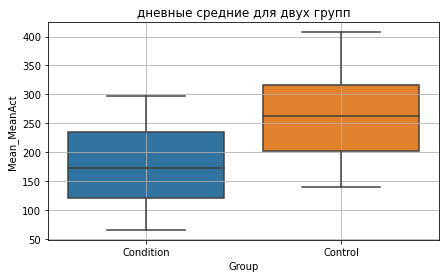

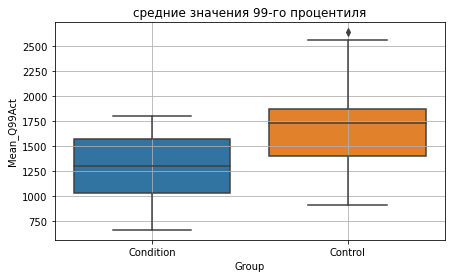

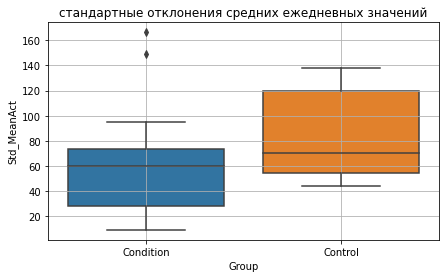

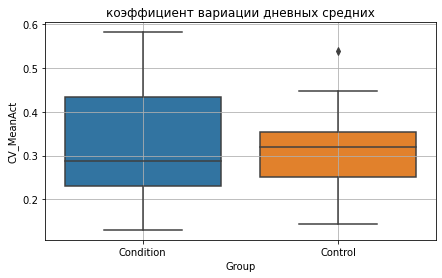

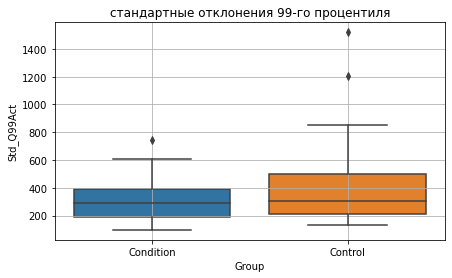

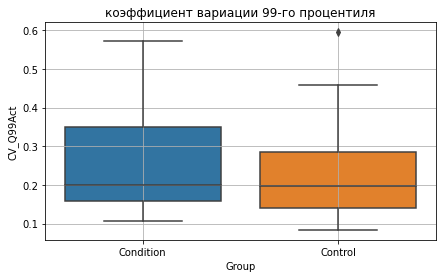

In [43]:
#сравним средние дневные средние для двух групп
sns.boxplot(data=combined_stats, x='Group', y='Mean_MeanAct')
plt.title('дневные средние для двух групп')
plt.grid()
plt.show()

# сравним средние значения 99-го процентиля
sns.boxplot(data=combined_stats, x='Group', y='Mean_Q99Act')
plt.title('средние значения 99-го процентиля')
plt.grid()
plt.show()

# сравним стандартные отклонения средних ежедневных значений
sns.boxplot(data=combined_stats, x='Group', y='Std_MeanAct')
plt.title('стандартные отклонения средних ежедневных значений')
plt.grid()
plt.show()

# сравним коэффициент вариации дневных средних
sns.boxplot(data=combined_stats, x='Group', y='CV_MeanAct')
plt.title('коэффициент вариации дневных средних')
plt.grid()
plt.show()

# сравним стандартные отклонения 99-го процентиля
sns.boxplot(data=combined_stats, x='Group', y='Std_Q99Act')
plt.title('стандартные отклонения 99-го процентиля')
plt.grid()
plt.show()

# сравним коэффициент вариации 99-го процентиля
sns.boxplot(data=combined_stats, x='Group', y='CV_Q99Act')
plt.title('коэффициент вариации 99-го процентиля')
plt.grid()
plt.show()

Посмотрим на отдельные наблюдения

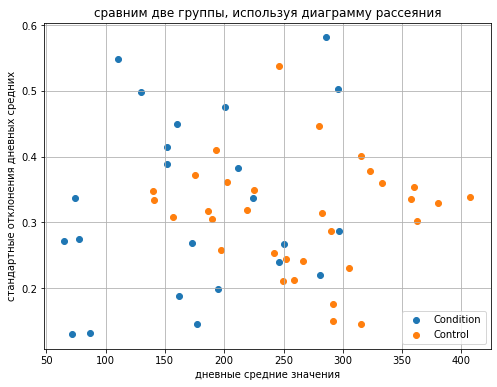

In [44]:
#сравним две группы, используя диаграмму рассеяния
plt.figure(figsize=(8,6))
plt.scatter(condition_stats.Mean_MeanAct, condition_stats.CV_MeanAct, label='Condition')
plt.scatter(control_stats.Mean_MeanAct, control_stats.CV_MeanAct, label='Control')
plt.legend(loc='lower right')
plt.xlabel('дневные средние значения')
plt.ylabel('стандартные отклонения дневных средних')
plt.title('сравним две группы, используя диаграмму рассеяния')
plt.grid()
plt.show()

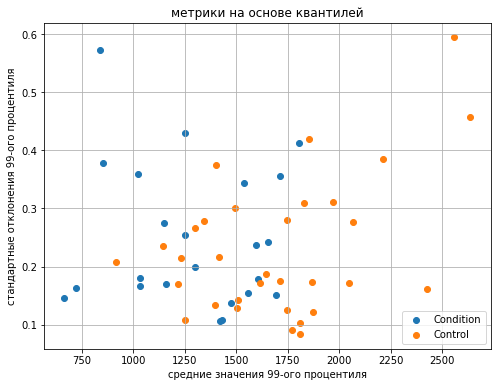

In [45]:
#сравним две группы, используя диаграмму рассеяния - теперь используя метрики на основе квантилей
plt.figure(figsize=(8,6))
plt.scatter(condition_stats.Mean_Q99Act, condition_stats.CV_Q99Act, label='Condition')
plt.scatter(control_stats.Mean_Q99Act, control_stats.CV_Q99Act, label='Control')
plt.legend(loc='lower right')
plt.xlabel('средние значения 99-ого процентиля')
plt.ylabel('стандартные отклонения 99-ого процентиля')
plt.title('метрики на основе квантилей')
plt.grid()
plt.show()

Имеет ли влияние аффтип (1: биполярный II, 2: униполярный депрессивный, 3: биполярный I)?

In [46]:
#добавить статистику в исходный фрейм данных (группу условий), чтобы получить доступ ко всем функциям
df_condition_x = pd.concat([df_condition, condition_stats.drop('number', axis=1)], axis=1)
df_condition_x = df_condition_x.drop('Group', axis=1)
df_condition_x.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,delta_madrs,Mean_MeanAct,Mean_Q99Act,Std_MeanAct,Std_Q99Act,CV_MeanAct,CV_Q99Act
0,condition_1,11,2,35-39,2,2,2,6-10,1,2,19.0,19.0,0.0,152.199630,1248.365333,59.218240,537.750628,0.389083,0.430764
1,condition_2,18,2,40-44,1,2,2,6-10,2,2,24.0,11.0,-13.0,296.403373,1691.552143,84.898469,256.541836,0.286429,0.151661
2,condition_3,13,1,45-49,2,2,2,6-10,2,2,24.0,25.0,1.0,130.193472,1250.976000,64.907332,317.950239,0.498545,0.254162
3,condition_4,13,2,25-29,2,2,2,11-15,1,1,20.0,16.0,-4.0,152.202579,1150.928571,63.119931,315.606819,0.414710,0.274219
4,condition_5,13,2,50-54,2,2,2,11-15,2,2,26.0,26.0,0.0,250.221389,1472.341333,66.762782,202.977926,0.266815,0.137861


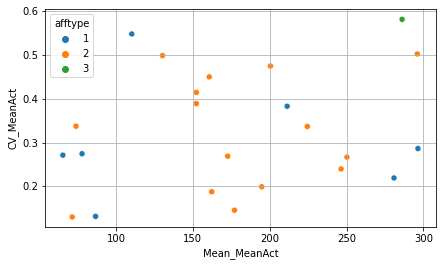

In [47]:
#диаграмма рассеяния
sns.scatterplot(data=df_condition_x,
                x='Mean_MeanAct', y='CV_MeanAct',
                hue='afftype')
plt.grid()
plt.show()

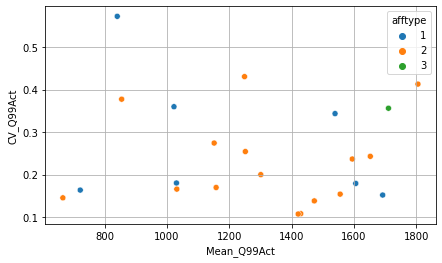

In [48]:
sns.scatterplot(data=df_condition_x,
                x='Mean_Q99Act', y='CV_Q99Act',
                hue='afftype')
plt.grid()
plt.show()

_______
_______
Перейдем к поиску зависимости между активностью и наличием депрессии

In [49]:
#сформируем фреймы данных
mean_list = []
std_list = []
q99_list = []
std_q99_list = []
max_act_list = []
max_mean_act_list = []
for dirname, _, filenames in os.walk('C:/Users/lalsk/Desktop/КУРСАЧ/input/data/condition'):
    for filename in filenames:
        my_file = os.path.join(dirname, filename)
        df_temp = pd.read_csv(my_file)
    
    # группировать по дате
        df_temp_by_date = df_temp.groupby(['date'], as_index=False).agg(
            n = pd.NamedAgg(column='activity', aggfunc='count'),
            mean_act = pd.NamedAgg(column='activity', aggfunc='mean'),
            q99_act = pd.NamedAgg(column='activity', aggfunc=lambda x : np.percentile(a=x, q=99)),
            max_act = pd.NamedAgg(column='activity', aggfunc='max')
        )

    # удалить неполные дни (24 * 60 минут = 1440)
        df_temp_by_date = df_temp_by_date[df_temp_by_date.n==1440]
    
    #извлечь статистику
        mean_temp = df_temp_by_date.mean_act.mean() # среднее значение средней дневной активности
        std_temp = df_temp_by_date.mean_act.std() # стандартное отклонение средней дневной активности
        mean_q99_temp = df_temp_by_date.q99_act.mean() # среднее значение 99-го процентиля дневной активности
        std_q99_temp = df_temp_by_date.q99_act.std() # стандартное отклонение 99-го процентиля дневной активности
        max_act_temp=df_temp_by_date.max_act.max() #максимальная активность в день
        max_mean_act_temp=df_temp_by_date.max_act.mean() #средняя из максимальных в день
    
    #добавить результаты в списки
        mean_list.append(mean_temp)
        std_list.append(std_temp)
        q99_list.append(mean_q99_temp)
        std_q99_list.append(std_q99_temp)
        max_act_list.append(max_act_temp)
        max_mean_act_list.append(max_mean_act_temp)

In [50]:
#сохранять результаты во фрейме данных
data_condition = pd.DataFrame(zip(df_condition.number, mean_list, q99_list, std_list, std_q99_list,max_act_list,max_mean_act_list), 
                               columns=['number','Mean_MeanAct','Mean_Q99Act','Std_MeanAct','Std_Q99Act','Max_Day_Act','Max_Mean_Day_Act'])

In [51]:
data_condition.head(2)

,number,Mean_MeanAct,Mean_Q99Act,Std_MeanAct,Std_Q99Act,Max_Day_Act,Max_Mean_Day_Act
0,condition_1,152.199630,1248.365333,59.218240,537.750628,3526,2133.200000
1,condition_2,296.403373,1691.552143,84.898469,256.541836,4935,2676.571429


In [52]:
data_condition['Mean_madrs'] = np.round((df_condition['madrs1']+df_condition['madrs2'])/2)

In [53]:
mean_list_control = []
std_list_control = []
q99_list_control = []
std_q99_list_control = []
max_act_list = []
max_mean_act_list = []
for dirname, _, filenames in os.walk('C:/Users/lalsk/Desktop/КУРСАЧ/input/data/control'):
    for filename in filenames:
        my_file = os.path.join(dirname, filename)
        df_temp = pd.read_csv(my_file)
    
    # группировать по дате
        df_temp_by_date = df_temp.groupby(['date'], as_index=False).agg(
            n = pd.NamedAgg(column='activity', aggfunc='count'),
            mean_act = pd.NamedAgg(column='activity', aggfunc='mean'),
            q99_act = pd.NamedAgg(column='activity', aggfunc=lambda x : np.percentile(a=x, q=99)),
            max_act = pd.NamedAgg(column='activity', aggfunc='max')
        )

    # удалить неполные дни (24 * 60 минут = 1440)
        df_temp_by_date = df_temp_by_date[df_temp_by_date.n==1440]
    
    # извлечь статистику
        mean_temp = df_temp_by_date.mean_act.mean() # среднее значение средней дневной активности
        std_temp = df_temp_by_date.mean_act.std() # стандартное отклонение средней дневной активности
        mean_q99_temp = df_temp_by_date.q99_act.mean() # среднее значение 99-го процентиля дневной активности
        std_q99_temp = df_temp_by_date.q99_act.std() # стандартное отклонение 99-го процентиля дневной активности
        max_act_temp=df_temp_by_date.max_act.max()
        max_mean_act_temp=df_temp_by_date.max_act.mean()

    # добавить результаты в списки
        mean_list_control.append(mean_temp)
        std_list_control.append(std_temp)
        q99_list_control.append(mean_q99_temp)
        std_q99_list_control.append(std_q99_temp)
        max_act_list.append(max_act_temp)
        max_mean_act_list.append(max_mean_act_temp)

In [54]:
#сохраним результаты во фрейме данных
data_control =  pd.DataFrame(zip(df_control.number, mean_list_control, q99_list_control, std_list_control, std_q99_list_control,max_act_list,max_mean_act_list), 
                               columns=['number','Mean_MeanAct','Mean_Q99Act','Std_MeanAct','Std_Q99Act','Max_Day_Act','Max_Mean_Day_Act'])

In [55]:
data_control.head(2)

,number,Mean_MeanAct,Mean_Q99Act,Std_MeanAct,Std_Q99Act,Max_Day_Act,Max_Mean_Day_Act
0,control_1,91.502574,823.200882,110.915118,943.727555,6117,1516.794118
1,control_2,290.439782,1865.657143,83.298433,324.491722,4245,3038.285714


мы знаем диапазон оценок madrs у здоровых людей, поэтому можем выставить из случайным образом для наблюдаемых, у которых эти оценки не измерялись

In [56]:
df_control['madrs1'] = 5
df_control['madrs2'] = 5
data_control['Mean_madrs'] = np.round((df_control['madrs1']+df_control['madrs2'])/2)
data_control.head()

,number,Mean_MeanAct,Mean_Q99Act,Std_MeanAct,Std_Q99Act,Max_Day_Act,Max_Mean_Day_Act,Mean_madrs
0,control_1,91.502574,823.200882,110.915118,943.727555,6117,1516.794118,5.0
1,control_2,290.439782,1865.657143,83.298433,324.491722,4245,3038.285714,5.0
2,control_3,165.834505,1237.190000,84.252517,560.527231,6752,2387.687500,5.0
3,control_4,91.868569,602.577826,77.489177,464.278203,2682,997.565217,5.0
4,control_5,175.276835,1232.532857,65.257581,264.449572,3180,2164.357143,5.0


In [57]:
data_all = pd.merge(data_condition,data_control,how ='outer')#объединим таблицы
data_all1 = pd.merge(data_condition,data_control,how ='outer')#объединим таблицы
target = data_all['Mean_madrs'] #отделим столбец с оценками
data_all = data_all.drop('number', axis = 1)
data_all = data_all.drop('Mean_madrs', axis = 1)
data_all.head()

,Mean_MeanAct,Mean_Q99Act,Std_MeanAct,Std_Q99Act,Max_Day_Act,Max_Mean_Day_Act
0,152.199630,1248.365333,59.218240,537.750628,3526,2133.200000
1,296.403373,1691.552143,84.898469,256.541836,4935,2676.571429
2,130.193472,1250.976000,64.907332,317.950239,3506,2047.533333
3,152.202579,1150.928571,63.119931,315.606819,3622,2025.785714
4,220.811029,1299.124706,103.888566,524.542094,4859,2290.176471


In [58]:
X_train, X_test, y_train, y_test = train_test_split(data_all ,target, train_size=0.6, random_state=241)

In [59]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)

[-0.10155681 -0.00714765  0.06633724 -0.01049892 -0.00193165  0.01365076]


In [60]:
results=cross_val_score(lasso,X_test,y_test,cv=3,scoring = 'neg_mean_squared_error')
print('mean_squared_error inv test')
results.mean()

mean_squared_error inv test


-77.02457150674981

In [61]:
results=cross_val_score(lasso,X_test,y_test,cv=3,scoring = 'neg_mean_absolute_error')
print('mean_absolute_error inv')
results.mean()

mean_absolute_error inv


-6.7155152419334705

In [62]:
results=cross_val_score(lasso,X_test,y_test,cv=4,scoring = 'r2')
print('R^2')
results.mean()

R^2


0.14133074625763486

In [63]:
new_data = data_all.copy()
new_data['target2']=np.round(lasso.predict(data_all))
target2 = new_data['target2']

_______
классификаторы

<ul>MADRS:

<li>От 0 до 10 баллов — у Вас нет депрессии</li>
<li>От 11 до 25 баллов — у Вас малый депрессивный эпизод</li>
<li>От 26 до 30 баллов — у Вас умеренный депрессивный эпизод</li>
<li>Более 30 баллов — у Вас большой депрессивный эпизод</li>
    
Максимальное количество баллов — 60</ul>

In [64]:
data_all = pd.concat([data_all,target],axis=1)
data_all.head()

,Mean_MeanAct,Mean_Q99Act,Std_MeanAct,Std_Q99Act,Max_Day_Act,Max_Mean_Day_Act,Mean_madrs
0,152.199630,1248.365333,59.218240,537.750628,3526,2133.200000,19.0
1,296.403373,1691.552143,84.898469,256.541836,4935,2676.571429,18.0
2,130.193472,1250.976000,64.907332,317.950239,3506,2047.533333,24.0
3,152.202579,1150.928571,63.119931,315.606819,3622,2025.785714,18.0
4,220.811029,1299.124706,103.888566,524.542094,4859,2290.176471,26.0


In [65]:
data_all_old = data_all.copy()

In [66]:
def cl (x): #функция для определения меток классов
    if(x<11): y=0
    else:
        if(x<26): 
            y=1
        else:
            if(x<31): y=2
            else: 
                    y=3
    return y

In [67]:
target_depr =pd.DataFrame(map(lambda x: cl(x), data_all.Mean_madrs))
target_depr = target_depr.astype('category')

In [68]:
X_train, X_test, y_train, y_test = train_test_split(data_all,target_depr, train_size=0.57, random_state=241)

In [69]:
logmodel = LogisticRegression(random_state=0)
y_train_ravel = np.ravel(y_train)
logmodel.fit(X_train,y_train_ravel)
predictions = logmodel.predict(X_test)
predictions

C:\Users\lalsk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       2, 0], dtype=int64)

In [70]:
print(confusion_matrix(y_test,predictions))#матрица ошибок

[[12  0  1]
 [ 0  7  2]
 [ 0  2  0]]


In [71]:
logmodel.score(X_test, y_test) #точность обучения

0.7916666666666666

In [72]:
print(classification_report(y_test,predictions, zero_division = 0))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.78      0.78      0.78         9
           2       0.00      0.00      0.00         2

    accuracy                           0.79        24
   macro avg       0.59      0.57      0.58        24
weighted avg       0.83      0.79      0.81        24



In [73]:
cl1 = pd.DataFrame(logmodel.predict(new_data)) 
#проверим как классифицируются данные с исходными оценками madrs и полученными ранее.
cl2 = pd.DataFrame(logmodel.predict(data_all_old))

In [74]:
data_all['pred'] = new_data['target2'].copy()
data_all['class_on_pred'] = cl1
data_all['class_on_mean_madrs'] = cl2
data_all['class'] = target_depr

In [75]:
corr = data_all.corr()
corr.style.background_gradient(cmap='coolwarm')

,Mean_MeanAct,Mean_Q99Act,Std_MeanAct,Std_Q99Act,Max_Day_Act,Max_Mean_Day_Act,Mean_madrs,pred,class_on_pred,class_on_mean_madrs,class
Mean_MeanAct,1.000000,0.922684,0.267326,-0.073492,0.368660,0.841317,-0.272360,-0.550560,-0.279218,-0.128982,-0.229445
Mean_Q99Act,0.922684,1.000000,0.103383,-0.100749,0.368702,0.950279,-0.122986,-0.339750,-0.086458,0.012685,-0.092833
Std_MeanAct,0.267326,0.103383,1.000000,0.823614,0.520448,0.042177,-0.403586,-0.655300,-0.455416,-0.361455,-0.400420
Std_Q99Act,-0.073492,-0.100749,0.823614,1.000000,0.469790,-0.128662,-0.334916,-0.502565,-0.366349,-0.348336,-0.305921
Max_Day_Act,0.368660,0.368702,0.520448,0.469790,1.000000,0.474559,-0.177313,-0.481993,-0.356262,-0.117874,-0.191906
Max_Mean_Day_Act,0.841317,0.950279,0.042177,-0.128662,0.474559,1.000000,-0.011590,-0.163285,-0.040207,0.041206,0.004549
Mean_madrs,-0.272360,-0.122986,-0.403586,-0.334916,-0.177313,-0.011590,1.000000,0.571117,0.525766,0.727146,0.948299
pred,-0.550560,-0.339750,-0.655300,-0.502565,-0.481993,-0.163285,0.571117,1.000000,0.607021,0.358132,0.503999
class_on_pred,-0.279218,-0.086458,-0.455416,-0.366349,-0.356262,-0.040207,0.525766,0.607021,1.000000,0.658309,0.519762
class_on_mean_madrs,-0.128982,0.012685,-0.361455,-0.348336,-0.117874,0.041206,0.727146,0.358132,0.658309,1.000000,0.747320


In [76]:
data_all1['class_on_pred'] = cl1
data_all1['class_on_mean_madrs'] = cl2
data_all1['pred'] = new_data['target2'].copy()
data_all1['class'] = target_depr

In [77]:
data_all1 = data_all1.drop('Max_Mean_Day_Act',axis = 1)
data_all1 = data_all1.drop('Mean_Q99Act',axis = 1)
data_all1 = data_all1.drop('Std_MeanAct',axis = 1)
data_all1 = data_all1.drop('Std_Q99Act',axis = 1)

In [78]:
for_madrs = pd.merge(df_condition,df_control,how='outer')
data_all1['madrs1'] = for_madrs ['madrs1']
data_all1['madrs2'] = for_madrs ['madrs2']

посмотрим классификацию на графиках распределений

C:\Users\lalsk\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\lalsk\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


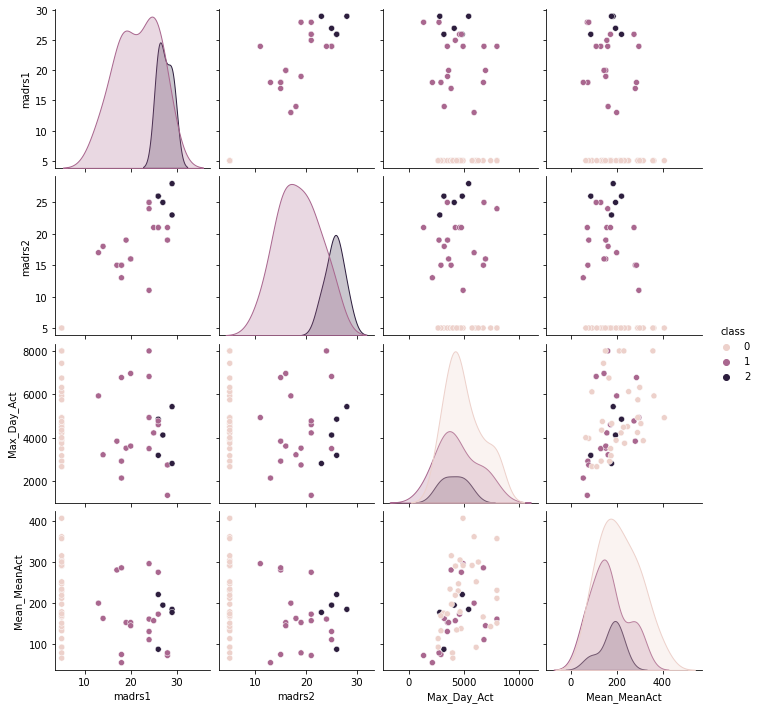

In [79]:
sns.pairplot(data_all1[['madrs1','madrs2','Max_Day_Act','Mean_MeanAct','class']], hue = 'class')

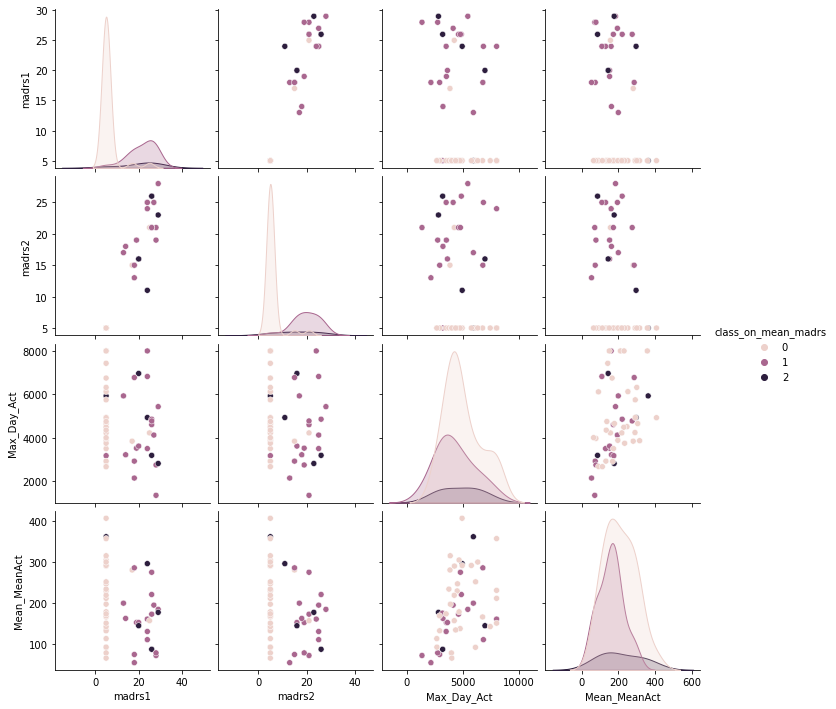

In [80]:
sns.pairplot(data_all1[['madrs1','madrs2','Max_Day_Act','Mean_MeanAct','class_on_mean_madrs']], hue = 'class_on_mean_madrs')

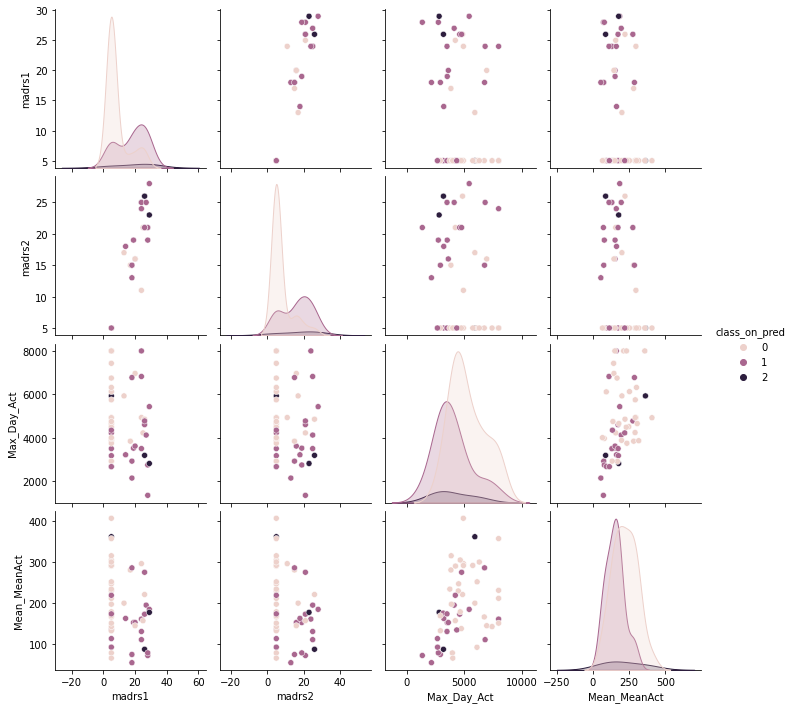

In [81]:
sns.pairplot(data_all1[['madrs1','madrs2','Max_Day_Act','Mean_MeanAct','class_on_pred']], hue = 'class_on_pred')